### Related to Figure 2


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import stats
import os
import matplotlib.pyplot as plt
from random import choices
import xgboost as xgb
import xgboost as XGBClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import auc, confusion_matrix, f1_score, roc_auc_score, accuracy_score, recall_score


In [3]:
def model_run(train_data,test_data, train_labels, test_labels):
    xgb_model = xgb.XGBClassifier(n_jobs=4)
    clf = GridSearchCV(xgb_model, {'max_depth': [2,3,4],
                                   'n_estimators': [100], 
                                   'learning_rate': [0.05, 0.1],
                                   #'gamma':[1],
                                   #'eta':[0.2,0.3,0.4],
                                  # 'min_child_weight':[1,2],
                                  # 'lambda':[1,2],
                                  # 'subsample':[0.8]
                                  }, verbose=1,cv=5, n_jobs=4) #5-fold cross validation

    clf.fit(train_data, train_labels.values)
    #print(clf.best_score_) #Train data
    para = (clf.best_params_)
    #print(clf.best_params_)

    xgb_model = xgb.XGBClassifier(n_jobs=1, learning_rate = para['learning_rate'], max_depth=para['max_depth'], n_estimators=para['n_estimators'])
    xgb_model.fit(train_data,train_labels.values)
    #predictions = xgb_model.predict(test_data)
    
    predictions = clf.predict(test_data)
    
    

    #print(pd.DataFrame({"Meausred": list(test_labels), "Predict": predictions}))

    # Evaluate the accuracy of the XGBoost model
    accuracy = accuracy_score(test_labels, predictions)

    #print("# Accuracy:  the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true")
    #print("Accuracy: ", accuracy)

    cm = confusion_matrix(  list(test_labels), predictions)
    tn = cm[0,0] #labled as negative and predicted as negative 
    fp = cm[0,1] #labeld as negative and predicted as positive
    fn = cm[1,0] #labeld as positive, and predicted as negative
    tp = cm[1,1] #labeld as positive, and predicted as positive
    
    sensitivity = cm[1,1]/(cm[1,0] + cm[1,1]) # TP/(FN + TP)
    specificity = tn/(tn+fp)
    
    sensitivity = cm[1,1]/(cm[1,0] + cm[1,1])
    precision = cm[1,1]/(cm[0,1] + cm[1,1])
    recall = recall_score(test_labels, predictions)
    blanced_acc = (sensitivity + specificity) /2 
    
    #print("Recall: " + str(recall))
    #print("# Recall: TP / (TP + FN)")

    #print("confusion_matrix")
    #print(cm)

    #print("sensitivity: "+ str(sensitivity))

    #print("Precision: " + str(precision))
    #print("# Precision = TP / (TP + FP) ")
    f1 = f1_score(list(test_labels), predictions)
    # F1 = 2 x [(Precision x Recall) / (Precision + Recall)]

    #print("F1_score: " + str(f1))
    #print("# F1: 2 x [(Precision x Recall) / (Precision + Recall)]")

    result_feature = pd.DataFrame({"Feature":list(test_data.columns), "IMP":xgb_model.feature_importances_})
    result_feature= result_feature.loc[result_feature['IMP']>0].sort_values(by = ['IMP'], ascending = False)

    #features = ((list(result_feature.loc[result_feature['IMP']>0.05].sort_values(by = ["IMP"], ascending = False)['Feature'])))

    result_summary = {}
    result_summary['random_state'] = random_
    result_summary['best_params'] = clf.best_params_
    result_summary['Accuracy'] = accuracy
    result_summary['Precision'] = precision
    result_summary['sensitivity'] = sensitivity
    result_summary['F1_score'] = f1
    result_summary['specificity'] = specificity #5
    result_summary['balanced_acc'] = blanced_acc #6
    result_summary['recall'] = recall #7
    result_summary['features'] = result_feature
    return(result_summary)

In [29]:
data_all  = pd.read_csv("beatAML_wave1_2_feature_ic50_highExpr.csv", index_col= "Unnamed: 0")


In [26]:
data_all.shape

(783, 17863)

In [27]:
Drug = "Venetoclax"
data_cur = pd.concat([data_all.iloc[0:,0:22], data_all[Drug]], axis = 1) # Step 1
#data_cur = pd.concat([data_all.iloc[0:,0:50], data_all[Drug]], axis = 1) # Step 2
#data_cur = pd.concat([data_all.iloc[0:,0:50+22843], data_all[Drug]], axis = 1) # Step 2


In [24]:
Drug_data = pd.read_csv("../../../Data_resource/Drug_Response.csv",index_col = "Unnamed: 0") 
Drug_data.loc[Drug_data['inhibitor'] == 'Venetoclax'].sort_values(by = ['ic50'])

,inhibitor,lab_id,ic50,auc
45789,Venetoclax,14-00739,0.013717,60.835856
46006,Venetoclax,16-00844,0.013717,80.510843
45931,Venetoclax,16-00118,0.013717,39.060599
45850,Venetoclax,15-00578,0.013717,61.904797
45849,Venetoclax,15-00571,0.013717,88.553160
...,...,...,...,...
46000,Venetoclax,16-00811,10.000000,243.487131
45999,Venetoclax,16-00788,10.000000,230.420938
45998,Venetoclax,16-00781,10.000000,231.019922
45893,Venetoclax,15-00909,10.000000,237.880887


In [18]:
data_cur.sort_values(by = ['Venetoclax'])

,NPM1,CEBPA,STAG2,SF3B1,PTPN11,TP53,BCOR,RUNX1,FLT3,SRSF2,...,GATA2,EZH2,ASXL1,NRAS,IDH1,U2AF1,TET2,IDH2,Venetoclax,Venetoclax_bi
13-00487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14-00279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13-00602,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
12-00362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16-00733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-00892,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1
15-00371,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1
14-00781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1
16-00048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,1


In [39]:

Drug = "Venetoclax"
data_cur = pd.concat([data_all.iloc[0:,0:22], data_all[Drug]], axis = 1) # Step 1
data_cur = data_cur.dropna()

q25 =np.quantile(data_cur[Drug].values, q = 0.25)
q50 = np.quantile(data_cur[Drug].values, q = 0.5)
q75 = np.quantile(data_cur[Drug].values, q = 0.75)

threshold_list_label = []
threshold_list = []
if q25 < 10:
    threshold_list.append(q25)
    threshold_list_label.append("Q25:" + str(round(q25,2)) + "μM")
if (q50 < 10 and q50 > q25):
    threshold_list.append(q50)
    threshold_list_label.append("Q50:" + str(round(q50,2)) + "μM")
if (q75 < 10 and q75 > q50):
    threshold_list.append(q75)
    threshold_list_label.append("Q75:" + str(round(q75,2)) + "μM")
    #if q75 < 1:
    #    threshold_list.append(1)

if max(threshold_list) < 1:
    threshold_list.append(1)
    threshold_list_label.append("1μM")
    #if q75 < 1:
threshold_list = list(set(threshold_list))
print(threshold_list)
    

[0.0190925713799281, 1.09390068135435]


In [40]:
data_cur

,SRSF2,IDH2,NPM1,JAK2,TET2,FLT3,DNMT3A,WT1,ASXL1,GATA2,...,PTPN11,SF3B1,CEBPA,IDH1,BCOR,RUNX1,TP53,U2AF1,KRAS,Venetoclax
16-00354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.572130
15-00045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.000000
16-00157,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.000000
16-00139,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.820085
15-00571,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.013717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-00742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013717
16-00094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.257774
15-00237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
17-00094,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.000000


In [42]:
data_cur

,SRSF2,IDH2,NPM1,JAK2,TET2,FLT3,DNMT3A,WT1,ASXL1,GATA2,...,SF3B1,CEBPA,IDH1,BCOR,RUNX1,TP53,U2AF1,KRAS,Venetoclax,Venetoclax_bi
16-00354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.572130,1
15-00045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.000000,1
16-00157,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.000000,1
16-00139,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.820085,1
15-00571,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.013717,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-00742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013717,1
16-00094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.257774,1
15-00237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,1
17-00094,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.000000,1


In [47]:
# compare prediction models using different threshold

result_with_threshod = {}
#for Threshod in [0.2, 0.5, 1]:
for Threshod in threshold_list:
    
    new_label = []
    for i in data_cur[Drug].values:
        if i <= Threshod:
            new_label.append(1)
        else:
            new_label.append(0)
    data_cur[Drug+"_bi"] = new_label

    result_all = {}
    for random_ in range(0,200,5): 
        sensitive_data = data_cur.loc[data_cur[Drug] <= Threshod]
        
        print("sensitive data: " + str(sensitive_data.shape[0]))
        resistant_data = data_cur.loc[data_cur[Drug] > Threshod]
        print("resistant data: " + str(resistant_data.shape[0]))
        train_data_sen, test_data_sen, train_labels_sen, test_labels_sen = train_test_split(sensitive_data.iloc[:,:-2], 
                                                                            sensitive_data.iloc[:,-1],
                                                                            test_size = 0.2, random_state = random_)
        train_data_res, test_data_res, train_labels_res, test_labels_res = train_test_split(resistant_data.iloc[:,:-2], 
                                                                            resistant_data.iloc[:,-1],
                                                                            test_size = 0.2, random_state = random_)

        train_data = pd.concat([train_data_sen, train_data_res])
        test_data = pd.concat([test_data_sen, test_data_res])
        train_labels = pd.concat([train_labels_sen, train_labels_res])
        test_labels = pd.concat([test_labels_sen, test_labels_res])

        result_all[random_] = model_run(train_data,test_data, train_labels, test_labels)
    result_with_threshod[Threshod] = result_all


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/1810901042.py:44: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1,1]/(cm[0,1] + cm[1,1])


sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 56
resistant data: 167
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 112
resistant data: 111
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 112
resistant data: 111
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 112
resistant data: 111
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 112
resistant data: 111
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 112
resistant data: 111
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sensitive data: 112
resistant data: 111
Fitting 5 folds for each of 6 candidates, totalling 30 fits
sens

In [44]:
result_with_threshod

{0.0190925713799281: {0: {'random_state': 0,
   'best_params': {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100},
   'Accuracy': 0.7391304347826086,
   'Precision': nan,
   'sensitivity': 0.0,
   'F1_score': 0.0,
   'specificity': 1.0,
   'balanced_acc': 0.5,
   'recall': 0.0,
   'features':    Feature       IMP
   5     FLT3  0.146399
   0    SRSF2  0.122414
   6   DNMT3A  0.104862
   2     NPM1  0.073465
   19    TP53  0.064654
   21    KRAS  0.059111
   17    BCOR  0.052131
   14   SF3B1  0.051983
   4     TET2  0.048520
   13  PTPN11  0.048322
   1     IDH2  0.047030
   8    ASXL1  0.046592
   18   RUNX1  0.040863
   7      WT1  0.034321
   10    NRAS  0.033073
   15   CEBPA  0.026260},
  5: {'random_state': 5,
   'best_params': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
   'Accuracy': 0.6956521739130435,
   'Precision': 0.3333333333333333,
   'sensitivity': 0.16666666666666666,
   'F1_score': 0.2222222222222222,
   'specificity': 0.8823529411764706,
  

In [48]:
Value_list = []
Type_list = []
Threshold_list = []
ACC_list = []
F1_list = []

for Threshod in  result_with_threshod:
    for random_state in result_with_threshod[Threshod]:
        ACC_list.append(result_with_threshod[Threshod][random_state]['balanced_acc'])
        F1_list.append(result_with_threshod[Threshod][random_state]['F1_score'])
        Threshold_list.append(Threshod)



([<matplotlib.axis.XTick at 0x1461c84c0>,
 [Text(0, 0, 'Q25:0.02μM'), Text(1, 0, 'Q50:1.09μM')])

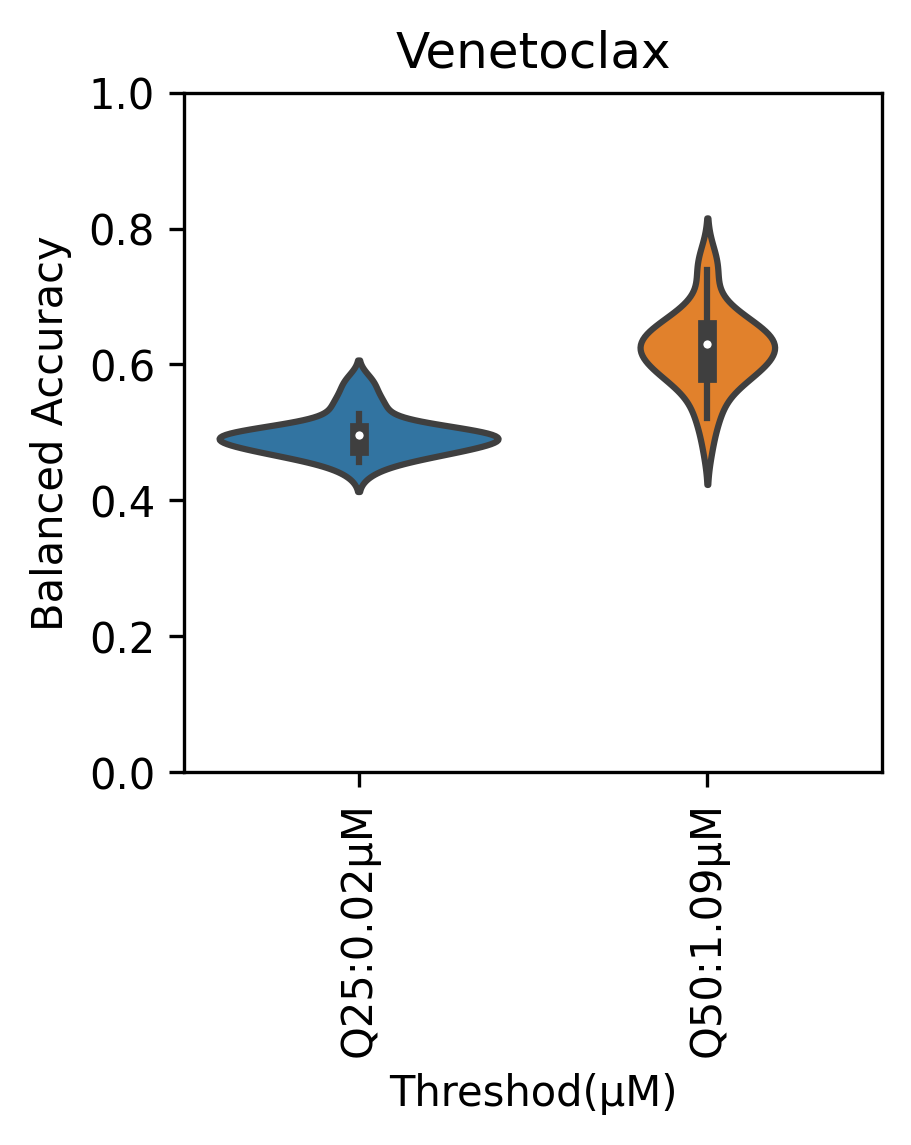

In [53]:
import seaborn as sns
plt.figure(figsize = (3,3),dpi = 300)

sns.violinplot(data=pd.DataFrame({"Threshod(μM)":Threshold_list, "Balanced Accuracy":ACC_list}), 
               x="Threshod(μM)", y="Balanced Accuracy")
#plt.ylim(0,)
plt.ylim(0,1)
plt.title(Drug.split("(")[0])
plt.xticks(range(0,len(threshold_list_label)), threshold_list_label, rotation = 90)


([<matplotlib.axis.XTick at 0x141bd0dc0>,
 [Text(0, 0, 'Q25:0.02μM'), Text(1, 0, 'Q50:1.09μM')])

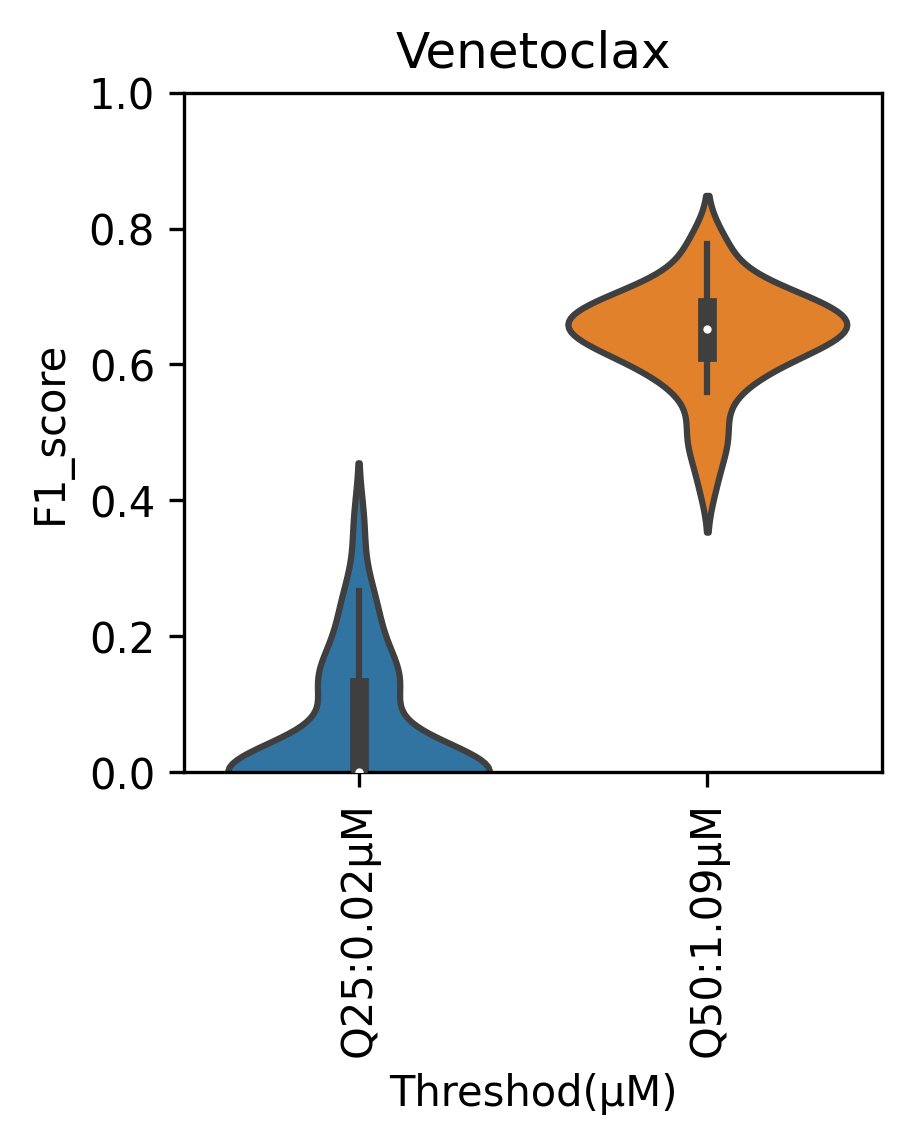

In [50]:
import seaborn as sns
plt.figure(figsize = (3,3),dpi = 300)

sns.violinplot(data=pd.DataFrame({"Threshod(μM)":Threshold_list, "F1_score":F1_list}), 
               x="Threshod(μM)", y="F1_score")
#plt.ylim(0,)
plt.ylim(0,1)
plt.title(Drug.split("(")[0])
plt.xticks(range(0,len(threshold_list_label)), threshold_list_label, rotation = 90)


<AxesSubplot:xlabel='Threshod(μM)', ylabel='F1_score'>

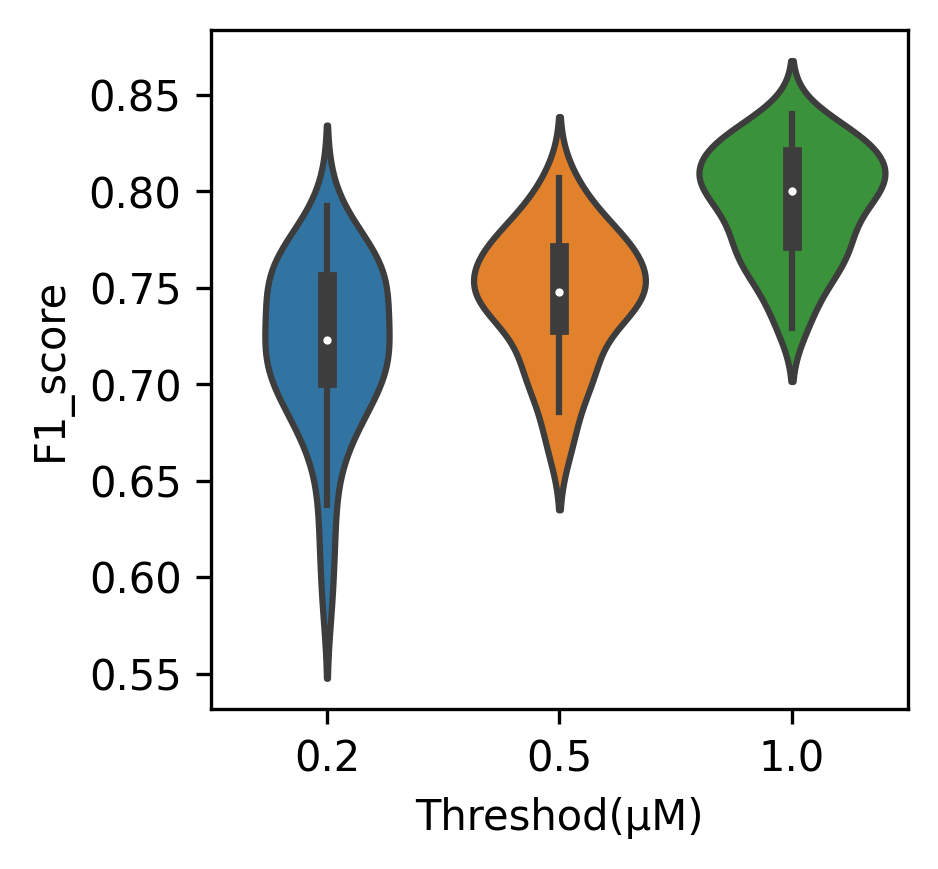

In [18]:
import seaborn as sns
plt.figure(figsize = (3,3),dpi = 300)
sns.violinplot(data=pd.DataFrame({"Threshod(μM)":Threshold_list, "F1_score":F1_list}), x="Threshod(μM)", y="F1_score")


In [51]:
threshold_list

[0.0190925713799281, 1.09390068135435]

In [52]:
# compare prediction models using different feature sets
Threshod = threshold_list[1]
Drug = "Venetoclax"

dic_dataset = {"set1":pd.concat([data_all.iloc[0:,0:22], data_all[Drug]], axis = 1), # Step 1,
               "set2":pd.concat([data_all.iloc[0:,0:50], data_all[Drug]], axis = 1), # Step 2
               "set3":pd.concat([data_all.iloc[0:,0:50+17691], data_all[Drug]], axis = 1) # Step 2

              }
result_with_threshod = {}

for dataset in dic_dataset:
    data_cur = dic_dataset[dataset]
    data_cur = data_cur.dropna()
    new_label = []
    for i in data_cur[Drug].values:
        if i <= Threshod:
            new_label.append(1)
        else:
            new_label.append(0)
    data_cur[Drug+"_bi"] = new_label

    result_all = {}
    for random_ in range(0,200,5): 
        sensitive_data = data_cur.loc[data_cur[Drug+"_bi"] == 1]
        resistant_data = data_cur.loc[data_cur[Drug+"_bi"] == 0]

        train_data_sen, test_data_sen, train_labels_sen, test_labels_sen = train_test_split(sensitive_data.iloc[:,:-2], 
                                                                            sensitive_data.iloc[:,-1],
                                                                            test_size = 0.2, random_state = random_)
        train_data_res, test_data_res, train_labels_res, test_labels_res = train_test_split(resistant_data.iloc[:,:-2], 
                                                                            resistant_data.iloc[:,-1],
                                                                            test_size = 0.2, random_state = random_)

        train_data = pd.concat([train_data_sen, train_data_res])
        test_data = pd.concat([test_data_sen, test_data_res])
        train_labels = pd.concat([train_labels_sen, train_labels_res])
        test_labels = pd.concat([test_labels_sen, test_labels_res])

        result_all[random_] = model_run(train_data,test_data, train_labels, test_labels)
    result_with_threshod[dataset] = result_all


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/4276919794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cur[Drug+"_bi"] = new_label


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates

/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/4276919794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cur[Drug+"_bi"] = new_label


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates

/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_48344/4276919794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cur[Drug+"_bi"] = new_label


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates

In [54]:
result_all

{0: {'random_state': 0,
  'best_params': {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100},
  'Accuracy': 0.6756756756756757,
  'Precision': 0.7142857142857143,
  'sensitivity': 0.5555555555555556,
  'F1_score': 0.6250000000000001,
  'specificity': 0.7894736842105263,
  'balanced_acc': 0.672514619883041,
  'recall': 0.5555555555555556,
  'features':               Feature       IMP
  5645          R_DIRC2  0.077030
  9307         R_TADA2B  0.076067
  2880        R_SLC15A3  0.057728
  4704        R_THEMIS2  0.046802
  9596         R_LRRC25  0.028792
  ...               ...       ...
  10478        R_PTP4A2  0.000416
  9386          R_UQCRH  0.000301
  9781         R_CCDC71  0.000271
  10524        R_SS18L1  0.000205
  17169  R_CTD-3099C6.9  0.000153
  
  [122 rows x 2 columns]},
 5: {'random_state': 5,
  'best_params': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
  'Accuracy': 0.8108108108108109,
  'Precision': 0.8235294117647058,
  'sensitivity': 0.77777777777

In [55]:
Value_list = []
Type_list = []
Threshold_list = []
ACC_list = []
F1_list = []

for Threshod in  result_with_threshod:
    for random_state in result_with_threshod[Threshod]:
        ACC_list.append(result_with_threshod[Threshod][random_state]['balanced_acc'])
        F1_list.append(result_with_threshod[Threshod][random_state]['F1_score'])
        Threshold_list.append(Threshod)



<AxesSubplot:xlabel='FeatureSet', ylabel='F1_score'>

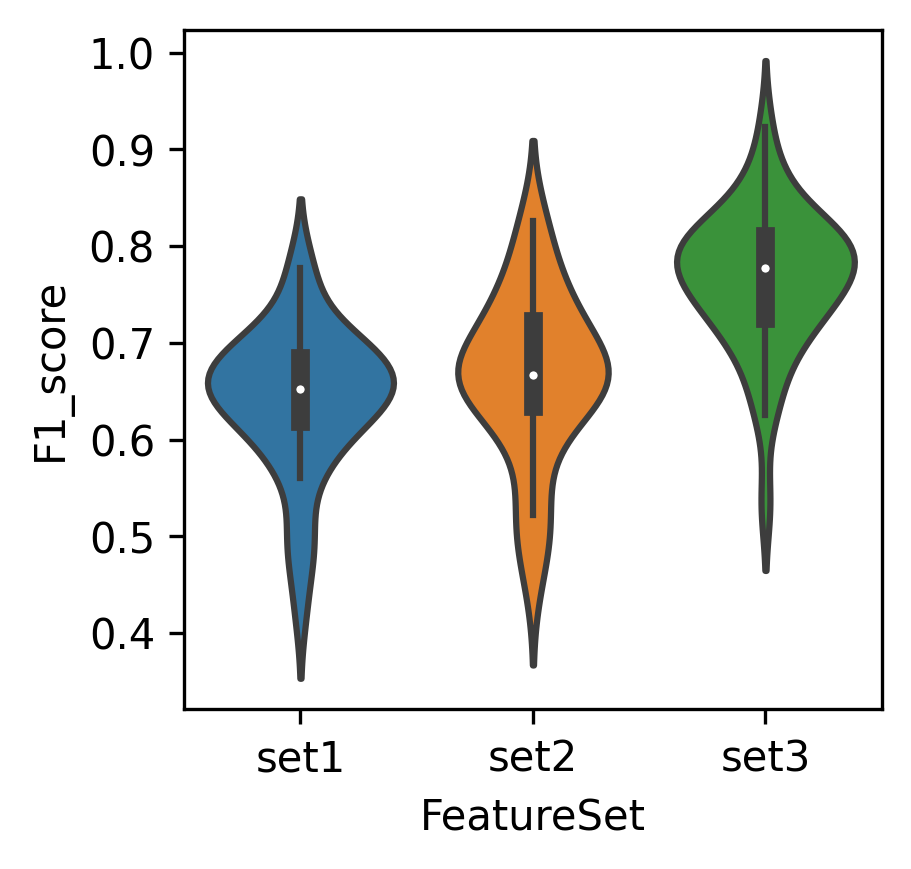

In [56]:
import seaborn as sns
plt.figure(figsize = (3,3),dpi = 300)
sns.violinplot(data=pd.DataFrame({"FeatureSet":Threshold_list, "F1_score":F1_list}), x="FeatureSet", y="F1_score")


In [62]:
r_data=pd.DataFrame({"FeatureSet":Threshold_list, "Balanced Accuracy":ACC_list})
np.median(r_data.loc[r_data['FeatureSet'] == 'set3']['Balanced Accuracy'].values)

0.7836257309941521

In [71]:
r_data=pd.DataFrame({"FeatureSet":Threshold_list, "F1_score":F1_list})
np.median(r_data.loc[r_data['FeatureSet'] == 'set3']['F1_score'].values)

0.7777777777777778

<AxesSubplot:xlabel='FeatureSet', ylabel='Balanced Accuracy'>

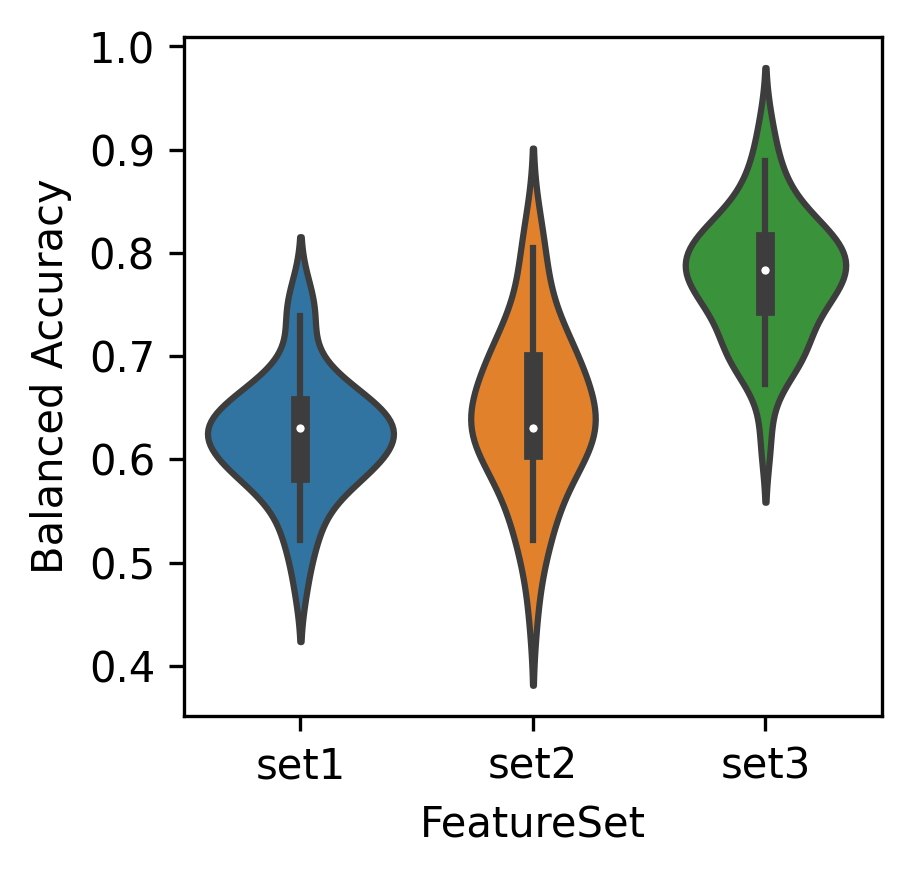

In [58]:
import seaborn as sns
plt.figure(figsize = (3,3),dpi = 300)
sns.violinplot(data=pd.DataFrame({"FeatureSet":Threshold_list, "Balanced Accuracy":ACC_list}), x="FeatureSet", y="Balanced Accuracy")


In [410]:
result_with_threshod

{'set1': {0: {'random_state': 0,
   'best_params': {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100},
   'Accuracy': 0.726027397260274,
   'Precision': 0.7205882352941176,
   'sensitivity': 0.98,
   'F1_score': 0.8305084745762712,
   'features':    Feature       IMP
   11    KRAS  0.116375
   20    NRAS  0.093045
   14    TP53  0.087631
   19   SRSF2  0.084416
   3     EZH2  0.081814
   12    IDH1  0.076799
   0     TET2  0.073635
   8      WT1  0.064605
   18  PTPN11  0.050219
   17   U2AF1  0.049490
   9    CEBPA  0.045030
   16  DNMT3A  0.041067
   10    NPM1  0.038801
   2    RUNX1  0.031799
   6    SF3B1  0.021203
   7    GATA2  0.014102
   15   ASXL1  0.012687
   5     FLT3  0.009038
   1    STAG2  0.008242},
  5: {'random_state': 5,
   'best_params': {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100},
   'Accuracy': 0.7123287671232876,
   'Precision': 0.7301587301587301,
   'sensitivity': 0.92,
   'F1_score': 0.8141592920353983,
   'features':    Feature    

In [65]:
feature_IMP =pd.DataFrame()
for random_state in result_with_threshod['set3']:
    features = result_with_threshod['set3'][random_state]['features']['Feature'].values
    IMP = result_with_threshod['set3'][random_state]['features']['IMP'].values
    cur_df = pd.DataFrame({"IMP" + str(random_state): IMP})
    cur_df.index = features
    feature_IMP = pd.concat([feature_IMP,cur_df ],axis =1)
    
IMP_sum = feature_IMP.transpose().sum()
x_feature = pd.DataFrame({"Feature":IMP_sum.index, "IMP":IMP_sum.values})
x_feature_sorted = x_feature.sort_values(by = ["IMP"], ascending = False).head(50)

([<matplotlib.axis.XTick at 0x143c147c0>,
 [Text(0, 0, 'R_MAP3K2'),
  Text(1, 0, 'R_SLC15A3'),
  Text(2, 0, 'R_BRI3'),
  Text(3, 0, 'R_UBL3'),
  Text(4, 0, 'R_ARSG'),
  Text(5, 0, 'R_LRRC25'),
  Text(6, 0, 'R_GRK4'),
  Text(7, 0, 'R_ATP6AP1L'),
  Text(8, 0, 'R_FBF1'),
  Text(9, 0, 'R_IPCEF1'),
  Text(10, 0, 'R_THEMIS2'),
  Text(11, 0, 'R_TADA2B'),
  Text(12, 0, 'R_EML4'),
  Text(13, 0, 'R_NOL6'),
  Text(14, 0, 'R_ZMYM3'),
  Text(15, 0, 'R_PECR'),
  Text(16, 0, 'R_LILRA6'),
  Text(17, 0, 'R_SNRNP27'),
  Text(18, 0, 'R_PFKFB4'),
  Text(19, 0, 'R_PTGER2'),
  Text(20, 0, 'R_C5AR1'),
  Text(21, 0, 'R_STK3'),
  Text(22, 0, 'R_CRIPT'),
  Text(23, 0, 'R_DIRC2'),
  Text(24, 0, 'R_TMEM99'),
  Text(25, 0, 'R_CBFA2T2'),
  Text(26, 0, 'R_LINC00471'),
  Text(27, 0, 'R_TSPO'),
  Text(28, 0, 'R_MAFB'),
  Text(29, 0, 'R_MAN1C1'),
  Text(30, 0, 'R_U47924.31'),
  Text(31, 0, 'R_C5orf42'),
  Text(32, 0, 'R_CCDC144B'),
  Text(33, 0, 'R_INPPL1'),
  Text(34, 0, 'R_MLLT11'),
  Text(35, 0, 'R_ANAPC7'),
  Text(

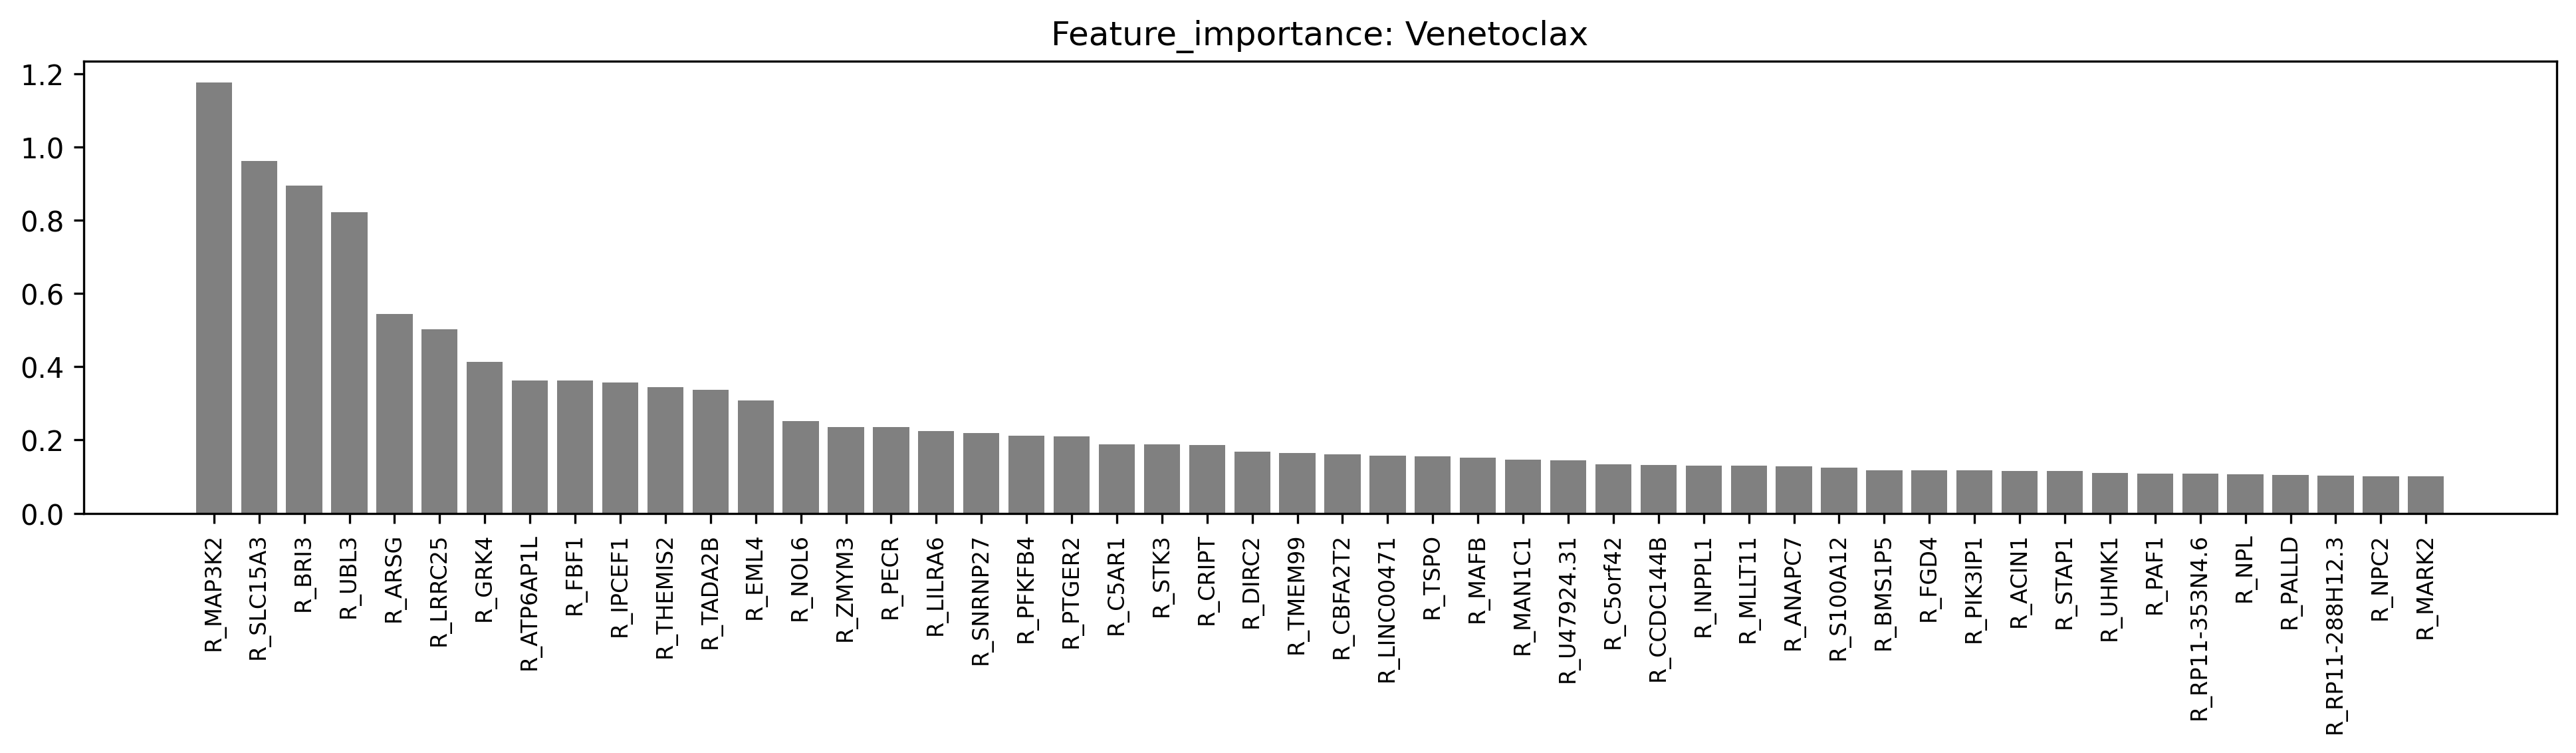

In [66]:
plt.figure(figsize = (16,3),dpi = 300)
plt.title("Feature_importance: " + "Venetoclax")
plt.bar(np.arange(0,x_feature_sorted.shape[0], 1), x_feature_sorted['IMP'], width=0.8,  color = 'grey',
        bottom=None,  align='center')
#plt.ylabel("correlation coeffient")
plt.xticks(np.arange(0,x_feature_sorted.shape[0], 1),x_feature_sorted['Feature'] , rotation = 90, fontsize =8)


In [449]:

x_feature.sort_values(by = ["IMP"], ascending = False).to_csv("Feature_importance_summary_Feb14_2023.csv")


In [67]:
x_feature.loc[x_feature['Feature'] == 'R_BCL2']

,Feature,IMP
48,R_BCL2,0.090869


In [157]:
feature_df.to_csv("Feature_importance_venetoclax_model3_mut_vaf_rnaseq_gt1_50p_Feb14_2023.csv")



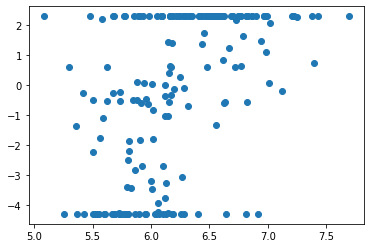

In [68]:

plt.scatter(data_all['R_MAP3K2'], np.log(data_all[Drug]))


Text(0.5, 1.0, 'Venetoclax')

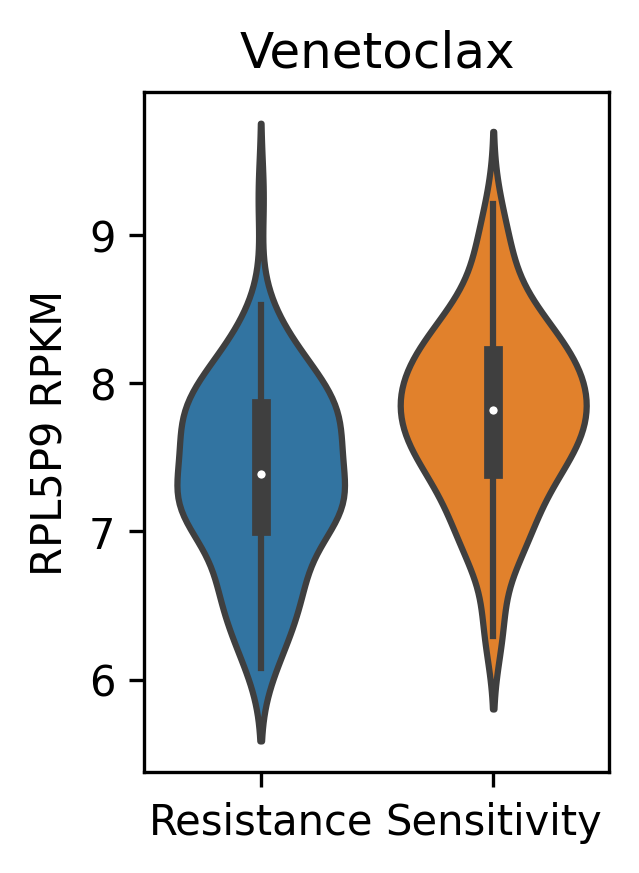

In [69]:
import seaborn as sns
plt.figure(figsize = (2,3),dpi = 300)
Drug = "Venetoclax"
feature_sele = 'R_EVI2B'
feature_sele = 'R_RPL5P9'
#feature_sele = 'R_CDA'

sns.violinplot(data=data_cur,  x=Drug+"_bi", y=feature_sele)
plt.ylabel(feature_sele.split("_")[1] + " RPKM")
plt.xticks(ticks = [0,1], labels = ["Resistance","Sensitivity"])
plt.xlabel('')
plt.title("Venetoclax")

In [433]:
from scipy.stats import ranksums

ranksums( data_cur.loc[data_cur[Drug+"_bi"] == 1][feature_sele].values, data_cur.loc[data_cur[Drug+"_bi"] == 0][feature_sele].values)

RanksumsResult(statistic=7.423905098713767, pvalue=1.1371665355436983e-13)

In [434]:
data_all
from scipy import stats
pos_cor = []
neg_cor = []
P_list = []
cor_list = []
Drug_list = []
for Drug in data_all.columns[17691+50:]:
    x = data_all.loc[:, [feature_sele,Drug]]
    x = x.dropna()
    Drug_list.append(Drug)
    r,p = stats.spearmanr(x[feature_sele], np.log(x[Drug]))
    P_list.append(p)
    cor_list.append(r)

import statsmodels
from statsmodels import stats
from statsmodels.stats import multitest

FDR_list = multitest.multipletests(P_list, alpha=0.05, method='fdr_bh')[1]   

/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, 

/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, 

In [435]:
y = pd.DataFrame({"Drug":Drug_list, "r":cor_list, 'P':P_list, "FDR":FDR_list})


In [436]:
y.loc[y['FDR']<0.05].sort_values(by = ['r']).shape[0]


51

In [437]:
feature_sele

'R_RPL5P9'

([<matplotlib.axis.XTick at 0x151345420>,
 [Text(0, 0, 'Venetoclax'),
  Text(1, 0, 'Nutlin 3a'),
  Text(2, 0, 'Bay 11-7085'),
  Text(3, 0, 'Lenvatinib'),
  Text(4, 0, 'Vemurafenib (PLX-4032)'),
  Text(5, 0, 'JQ1'),
  Text(6, 0, 'Volasertib (BI-6727)'),
  Text(7, 0, 'DBZ'),
  Text(8, 0, 'Palbociclib'),
  Text(9, 0, 'Entospletinib (GS-9973)'),
  Text(10, 0, 'Panobinostat'),
  Text(11, 0, 'Gilteritinib (ASP-2215)'),
  Text(12, 0, 'SR9011'),
  Text(13, 0, 'Lenalidomide'),
  Text(14, 0, 'Lovastatin'),
  Text(15, 0, 'Selinexor'),
  Text(16, 0, 'NF-kB Activation Inhibitor'),
  Text(17, 0, 'Entrectinib'),
  Text(18, 0, 'Ibrutinib (PCI-32765)'),
  Text(19, 0, 'LY-333531'),
  Text(20, 0, 'Erlotinib'),
  Text(21, 0, 'INK-128'),
  Text(22, 0, 'VX-745'),
  Text(23, 0, 'Linifanib (ABT-869)'),
  Text(24, 0, 'ABT-737'),
  Text(25, 0, 'AT7519'),
  Text(26, 0, 'CI-1040 (PD184352)'),
  Text(27, 0, 'JNJ-7706621'),
  Text(28, 0, 'Bortezomib (Velcade)'),
  Text(29, 0, 'PI-103'),
  Text(30, 0, '17-AAG (Tanes

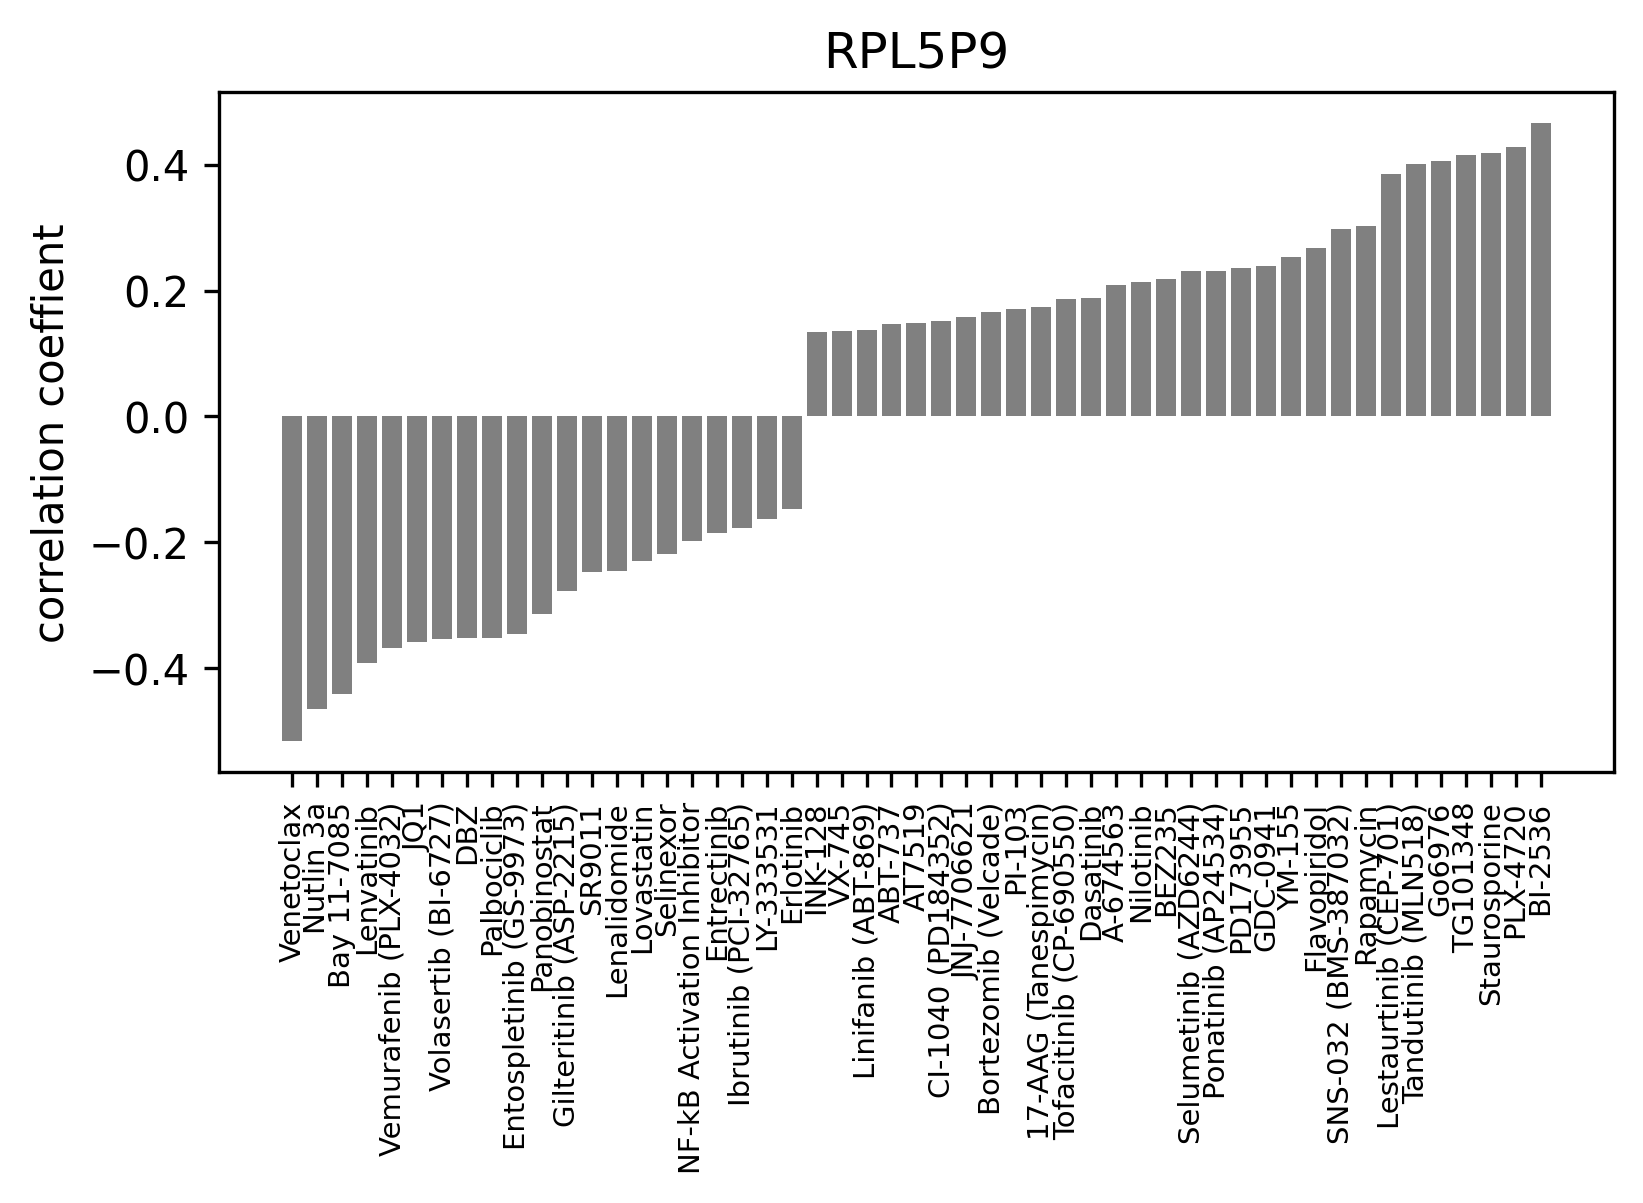

In [439]:
y.loc[y['FDR']<0.05].sort_values(by = ['r'])
plt.figure(figsize = (6,3),dpi = 300)
plt.title(feature_sele.split("_")[1])
plt.bar(np.arange(0, y.loc[y['FDR']<0.05].sort_values(by = ['r']).shape[0], 1), y.loc[y['FDR']<0.05].sort_values(by = ['r'])['r'], width=0.8,  color = 'grey',
        bottom=None,  align='center')
plt.ylabel("correlation coeffient")
plt.xticks(np.arange(0, y.loc[y['FDR']<0.05].sort_values(by = ['r']).shape[0], 1), y.loc[y['FDR']<0.05].sort_values(by = ['r'])['Drug'], rotation = 90, fontsize =7)


In [292]:
list(y.loc[y['FDR']<0.05].sort_values(by = ['r'], ascending = False)['Drug'])

['Venetoclax',
 'Palbociclib',
 'PHA-665752',
 'Erlotinib',
 'Nutlin 3a',
 'GSK-1838705A',
 'LY-333531',
 'NF-kB Activation Inhibitor',
 'Panobinostat',
 'Neratinib (HKI-272)',
 'MLN8054',
 'Bay 11-7085',
 '17-AAG (Tanespimycin)',
 'SNS-032 (BMS-387032)',
 'Linifanib (ABT-869)',
 'MK-2206',
 'BEZ235',
 'Selumetinib (AZD6244)',
 'Axitinib (AG-013736)',
 'GDC-0941',
 'Dasatinib',
 'Nilotinib',
 'Rapamycin']

/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

Text(0, 0.5, 'Density')

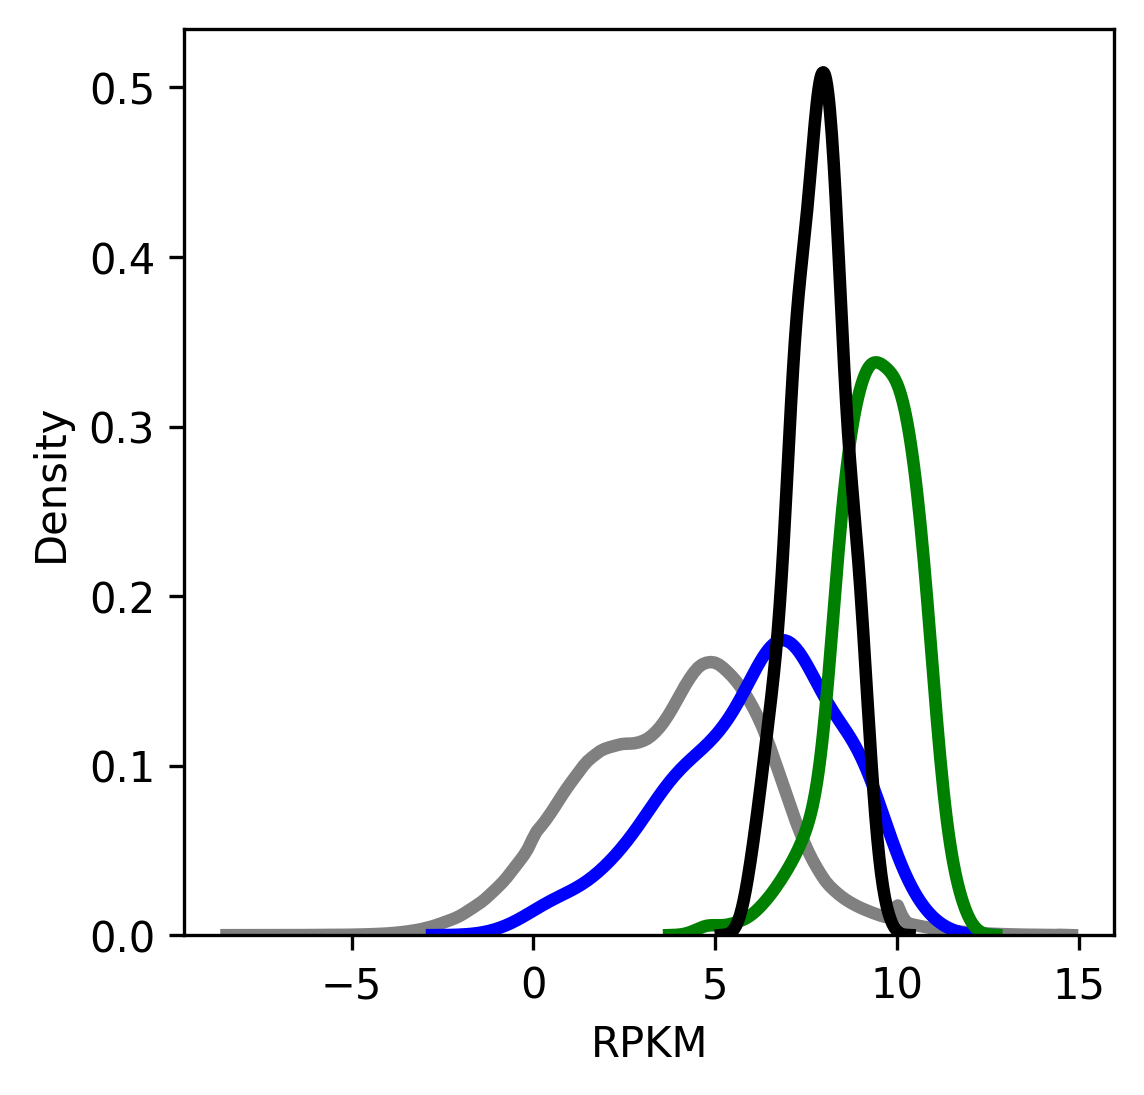

In [70]:
plt.figure(figsize = (4,4),dpi = 300)

sns.distplot(data_all.iloc[0:783,51:50+22843], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = "all_genes", color = 'grey')
sns.distplot(data_all['R_CDA'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = "CDA", color = "blue")
sns.distplot(data_all['R_EVI2B'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = "RPL5P9", color = "green")
sns.distplot(data_all['R_RPL5P9'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = "RPL5P9", color = "black")

plt.xlabel('RPKM')
plt.ylabel('Density')

Text(0, 0.5, 'CDA (RPKM)')

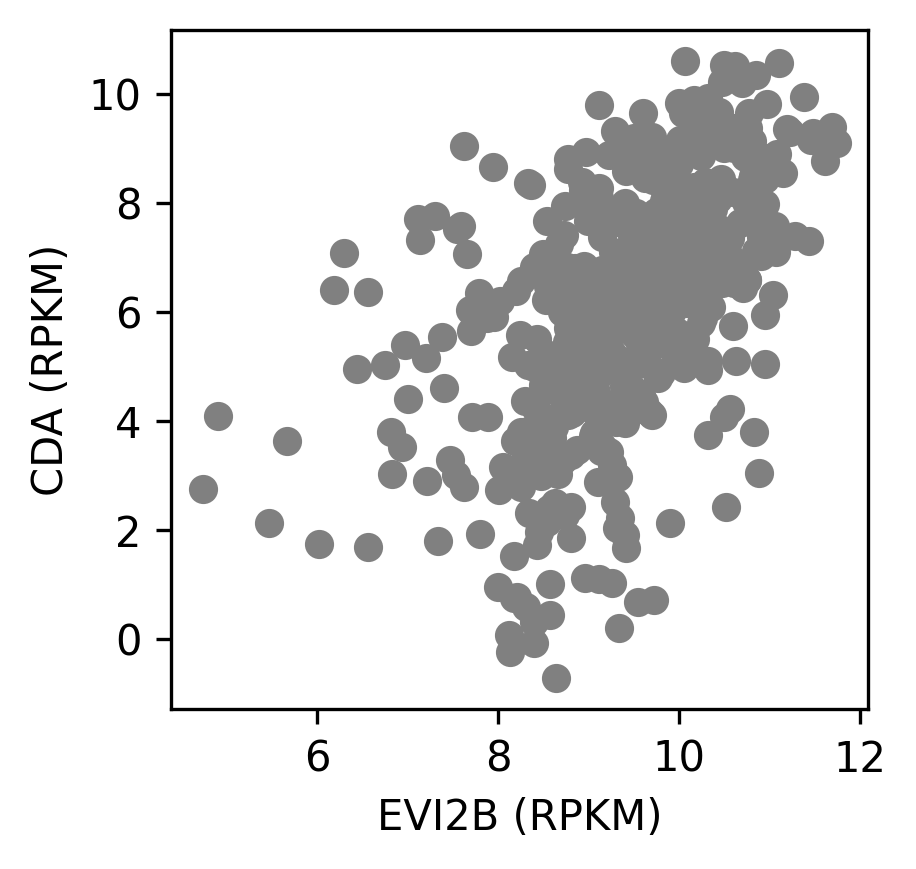

In [343]:
plt.figure(figsize = (3,3),dpi = 300)

x = data_all.loc[:,['R_EVI2B','R_CDA']]
x = x.dropna()
plt.scatter(data_all['R_EVI2B'],data_all['R_CDA'], color = 'gray' )
plt.xlabel("EVI2B (RPKM)")
plt.ylabel("CDA (RPKM)")

In [454]:
print("featureSet,random_state,Accuracy,Precision,sensitivity,F1_score")
for dataset in result_with_threshod:
    result_all = result_with_threshod[dataset]
    for randome_ in result_all:
        print(dataset + ',' + str(result_all[randome_]['random_state'])+"," + str(result_all[randome_]['Accuracy']) + "," +
              dataset + ',' + str(result_all[randome_]['Precision']) + "," + str(result_all[randome_]['sensitivity']) + "," + str(result_all[randome_]['F1_score']))
        


featureSet,random_state,Accuracy,Precision,sensitivity,F1_score
set1,0,0.726027397260274,set1,0.7205882352941176,0.98,0.8305084745762712
set1,5,0.7123287671232876,set1,0.7301587301587301,0.92,0.8141592920353983
set1,10,0.726027397260274,set1,0.7272727272727273,0.96,0.8275862068965517
set1,15,0.6712328767123288,set1,0.7166666666666667,0.86,0.7818181818181817
set1,20,0.6438356164383562,set1,0.6875,0.88,0.7719298245614036
set1,25,0.6164383561643836,set1,0.671875,0.86,0.7543859649122807
set1,30,0.6438356164383562,set1,0.7068965517241379,0.82,0.7592592592592593
set1,35,0.684931506849315,set1,0.7014925373134329,0.94,0.8034188034188033
set1,40,0.6164383561643836,set1,0.6833333333333333,0.82,0.7454545454545455
set1,45,0.726027397260274,set1,0.7142857142857143,1.0,0.8333333333333333
set1,50,0.7123287671232876,set1,0.704225352112676,1.0,0.8264462809917354
set1,55,0.7123287671232876,set1,0.7101449275362319,0.98,0.823529411764706
set1,60,0.6438356164383562,set1,0.6764705882352942,0.92,0.7796610169

In [456]:
for dataset in result_with_threshod:
    result_all = result_with_threshod[dataset]

    for randome_ in result_all:
        print(dataset + "," + str(randome_))
        print( result_all[randome_]['best_params'])

set1,0
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
set1,5
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,10
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,15
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,20
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,25
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
set1,30
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
set1,35
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,40
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
set1,45
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,50
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,55
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,60
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
set1,65
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
set1,70
{'learning_rate': 0.05, 'max_d

## result_all has been output to model_3_mut_vaf_rnaseq_acc.csv